# Import Packages

In [18]:
import warnings 
warnings.simplefilter(action='ignore')
import pandas as pd
import os
import sys
parent_path = os.path.join(os.getcwd(), '..')
if parent_path not in sys.path:
    sys.path.append(parent_path)
import pickle
from pypinyin import pinyin, Style

import numpy as np
from utility.data import data_imputer, data_slicing, \
    transformer_slice, get_dict_from_pd, train_test_split
from utility.visuals import plot_time_series, yield_visuals
from model.gpt import GPT_fit, GPT_predict, get_desired_sequence
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
AdaBoostRegressor
import matplotlib.pyplot as plt

# Retrieve Data

In [5]:

with open('../Data/source_data.pkl', 'rb') as f:
    df = pickle.load(f)
df_list, date_range = data_imputer(df)
date_num = date_range.values
sequences = get_dict_from_pd(df_list, 'address1', '受傷')

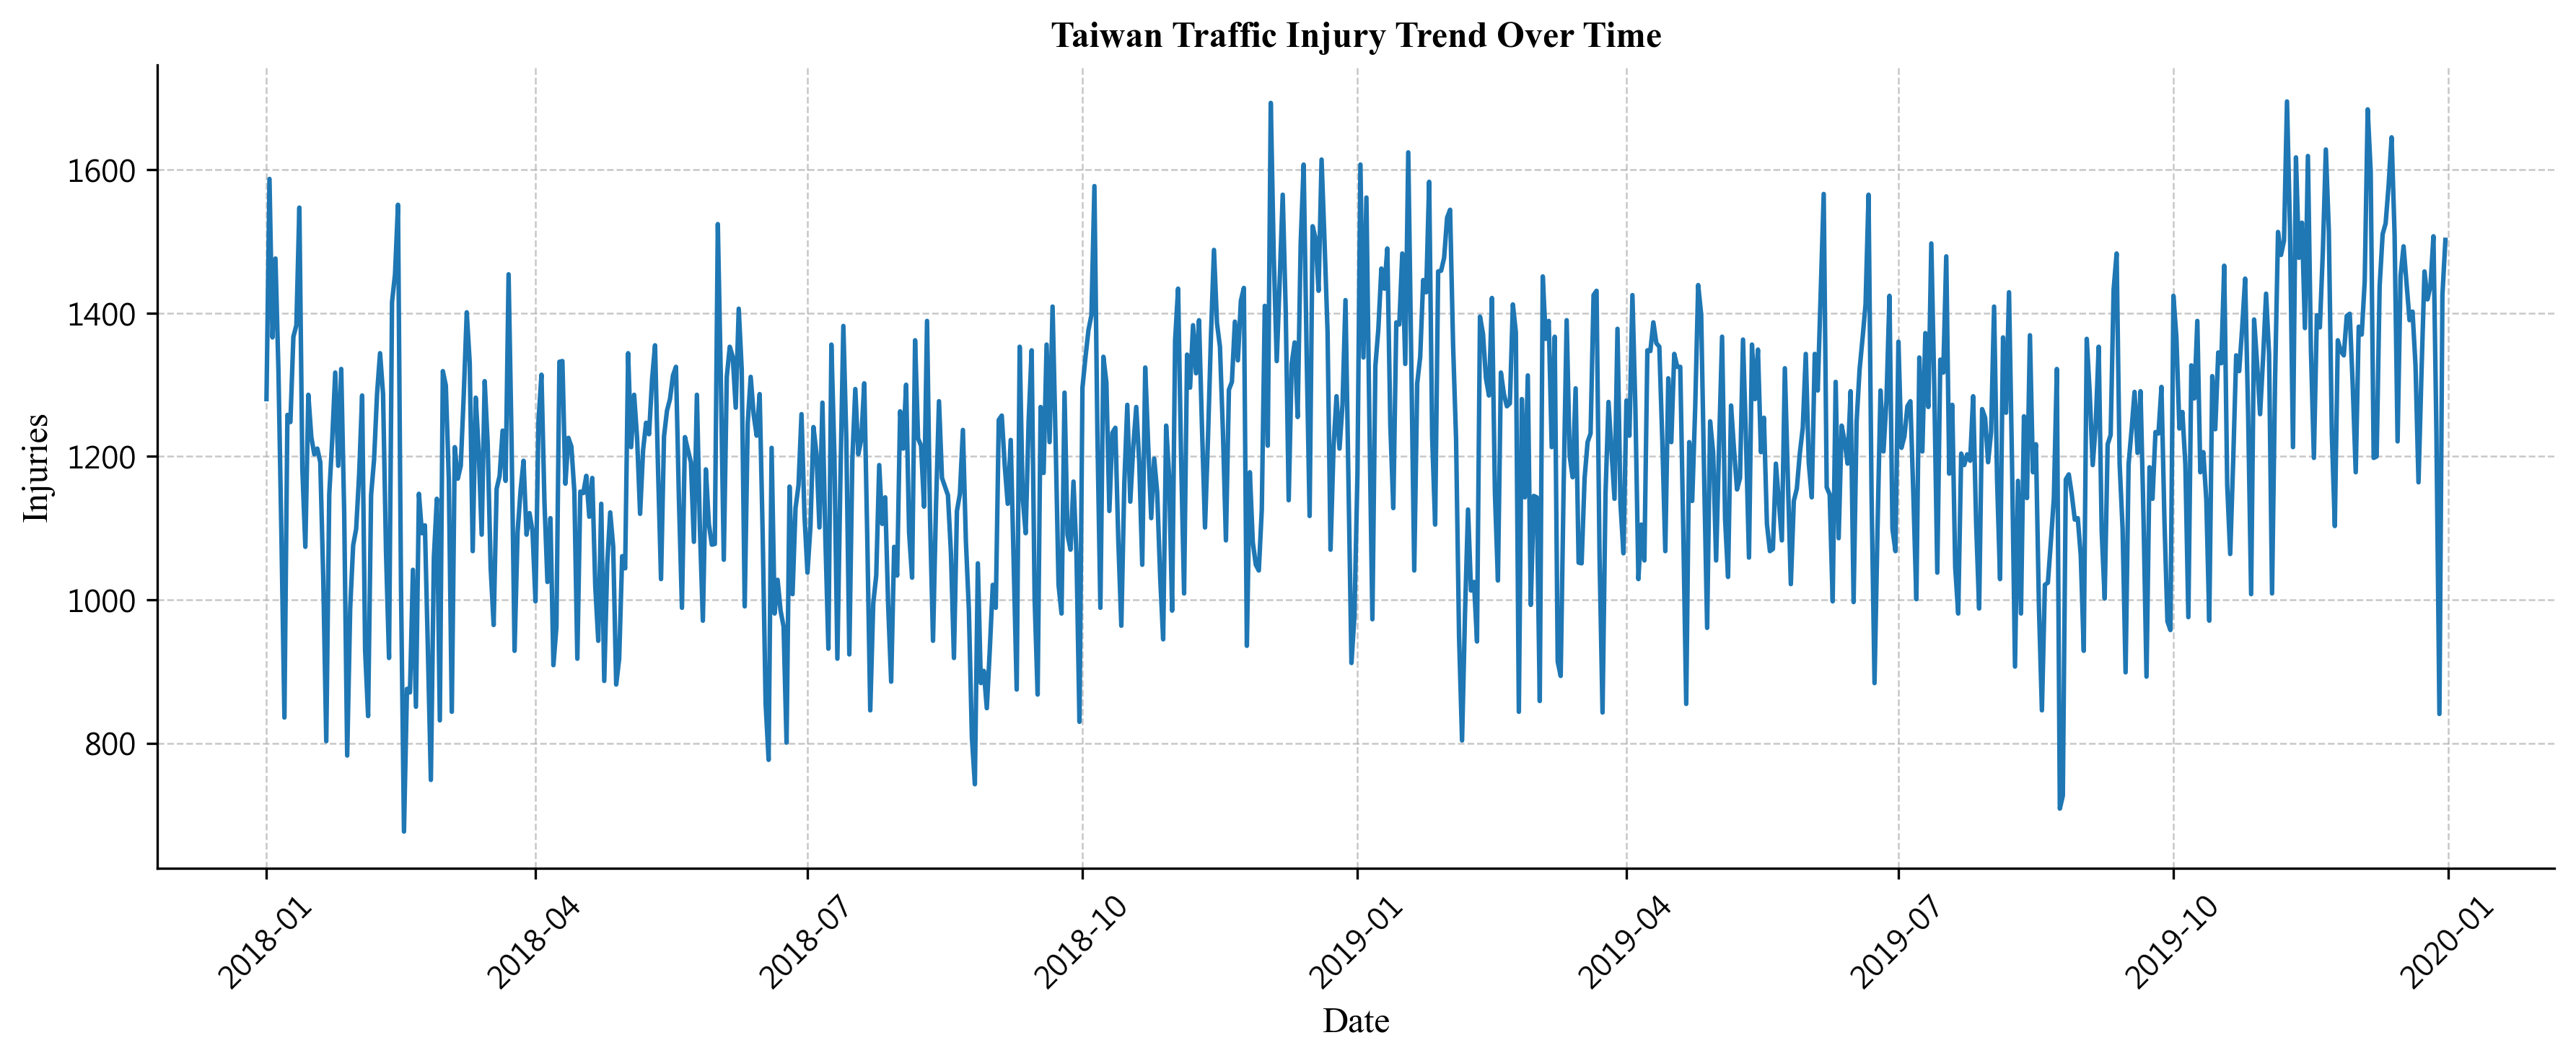

In [28]:
dataset = pd.concat(df_list)
dataset_grouped = dataset.groupby("datetime").sum(numeric_only=True)

# Create a high-DPI figure for publication quality
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

# Plot the data
ax.plot(dataset_grouped.index, dataset_grouped.iloc[:, 0], 
        linewidth=1.5, label='Injuries')

# Set axis labels
ax.set_xlabel("Date", fontsize=12, fontname="Times New Roman")
ax.set_ylabel("Injuries", fontsize=12, fontname="Times New Roman")

# Set title in bold
ax.set_title("Taiwan Traffic Injury Trend Over Time", fontsize=12, fontname="Times New Roman", fontweight='bold')

# Format x-axis ticks
ax.tick_params(axis='x', rotation=45)

# Remove top and right spines for IEEE style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid for better readability
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)


# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Data splitting / slicing

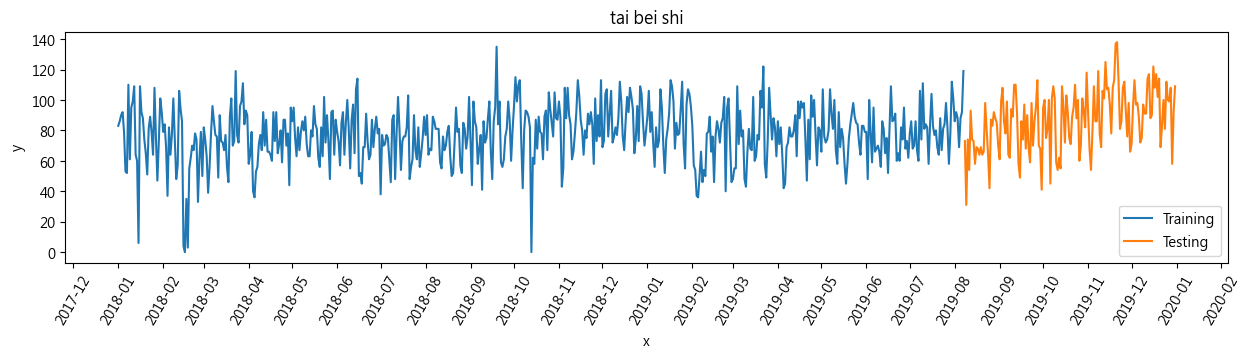

{}

In [3]:

curr_address = '臺北市'
length = sequences[curr_address].shape[0]
train, test = train_test_split(sequences[curr_address], length)
train_x, train_y, final_segment = data_slicing(train, 150)
train_x_g, train_y_g, final_segment = transformer_slice(train, 150)
plot_time_series(train, test, xticks=date_num, title=curr_address, pred=np.array([]))



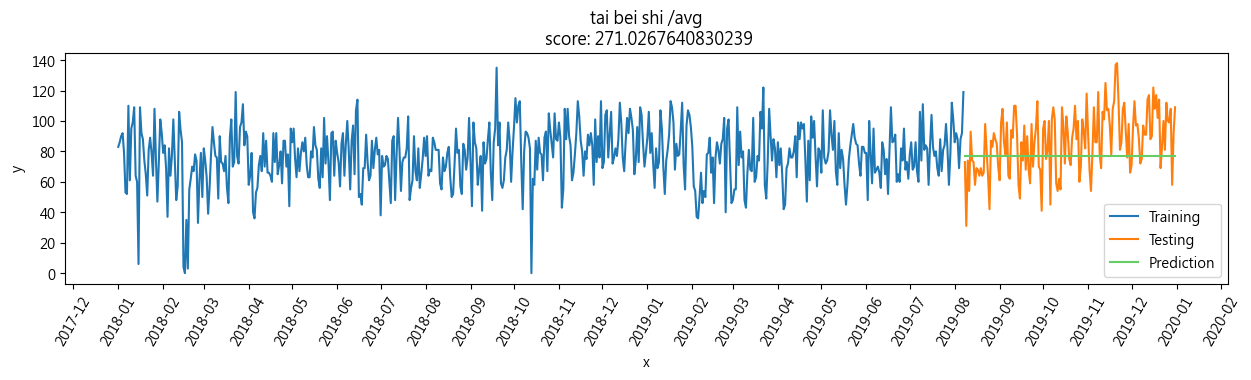

100%|██████████| 145/145 [00:00<00:00, 2086.64it/s]


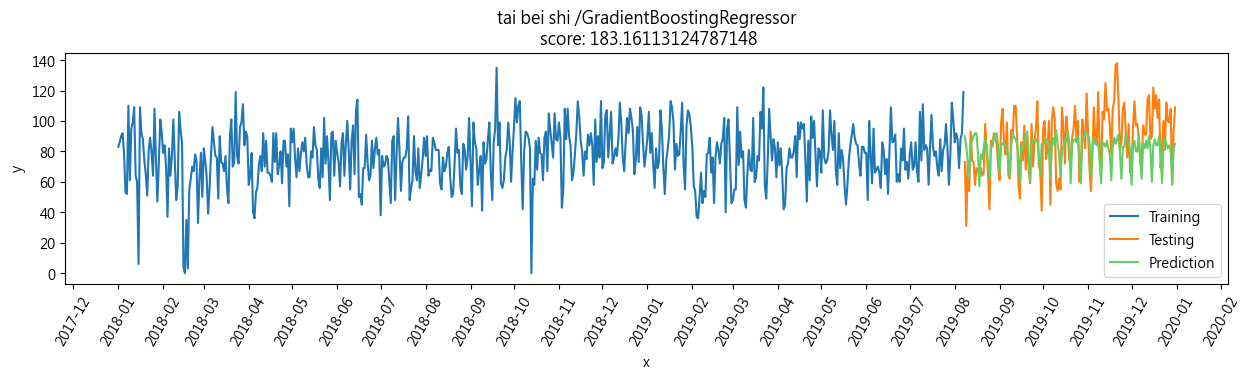

100%|██████████| 145/145 [00:02<00:00, 67.01it/s]


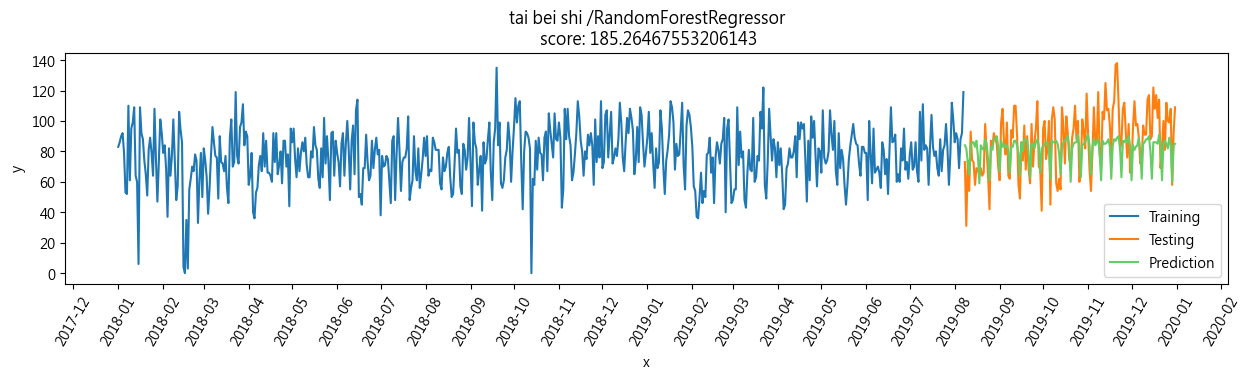

100%|██████████| 145/145 [00:01<00:00, 101.03it/s]


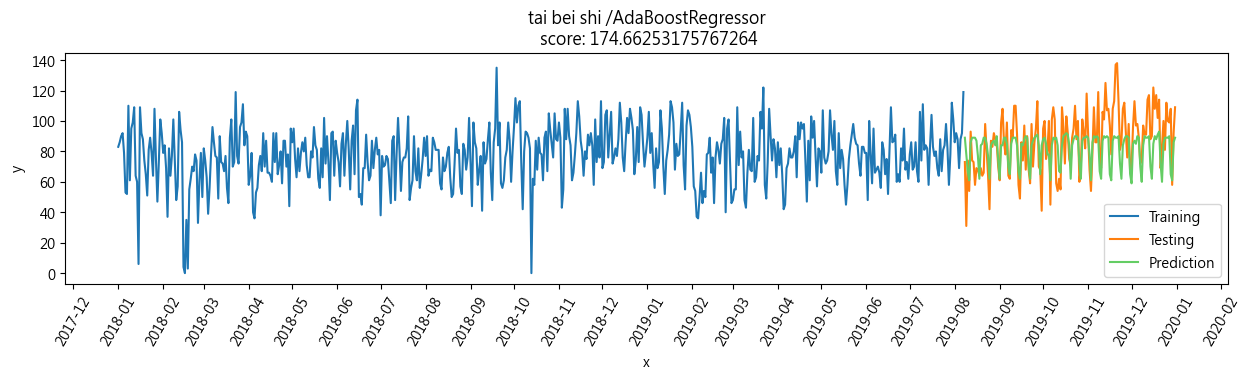

In [4]:
plot_time_series(train, test, xticks=date_num, title=curr_address \
                 + "/avg\n", pred=np.mean(train) * np.ones_like(test))  
  
g_map = yield_visuals(GradientBoostingRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
r_map = yield_visuals(RandomForestRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
a_map = yield_visuals(AdaBoostRegressor, final_segment, {},\
              train_x, train_y, train, test, date_num, curr_address)
